## Exercise 1

### **Exploring Class Separability in 2D**

Understanding how data is distributed is the first step before designing a network architecture. In this exercise, you will generate and visualize a two-dimensional dataset to explore how data distribution affects the complexity of the decision boundaries a neural network would need to learn.

### **Instructions**

1.  **Generate the Data:** Create a synthetic dataset with a total of 400 samples, divided equally among 4 classes (100 samples each). Use a Gaussian distribution to generate the points for each class based on the following parameters:
    * **Class 0:** Mean = $[2, 3]$, Standard Deviation = $[0.8, 2.5]$
    * **Class 1:** Mean = $[5, 6]$, Standard Deviation = $[1.2, 1.9]$
    * **Class 2:** Mean = $[8, 1]$, Standard Deviation = $[0.9, 0.9]$
    * **Class 3:** Mean = $[15, 4]$, Standard Deviation = $[0.5, 2.0]$


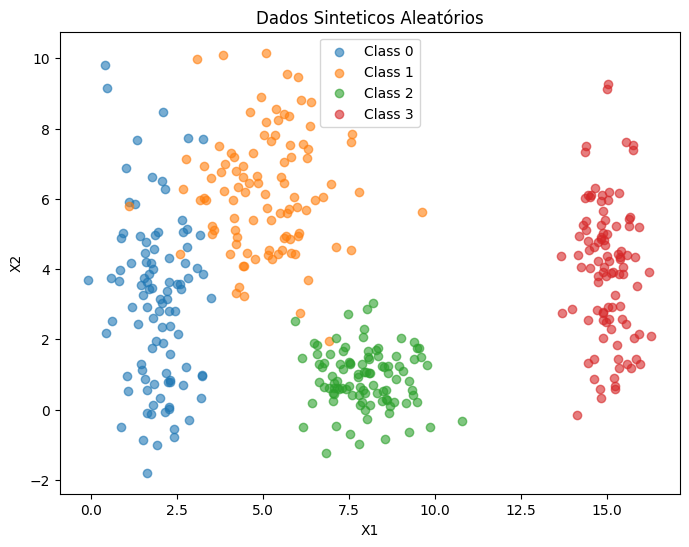

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

class0 = {
    "x": np.random.normal(2, 0.8, size=100),
    "y": np.random.normal(3, 2.5, size=100)
}

class1 = {
    "x": np.random.normal(5, 1.2, size=100),
    "y": np.random.normal(6, 1.9, size=100)
}

class2 = {
    "x": np.random.normal(8, 0.9, size=100),
    "y": np.random.normal(1, 0.9, size=100)
}

class3 = {
    "x": np.random.normal(15, 0.5, size=100),
    "y": np.random.normal(4, 2.0, size=100)
}


plt.figure(figsize=(8,6))
plt.scatter(class0["x"], class0["y"], label="Class 0", alpha=0.6)
plt.scatter(class1["x"], class1["y"], label="Class 1", alpha=0.6)
plt.scatter(class2["x"], class2["y"], label="Class 2", alpha=0.6)
plt.scatter(class3["x"], class3["y"], label="Class 3", alpha=0.6)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dados Sinteticos Aleatórios")
plt.show()


2.  **Plot the Data:** Create a 2D scatter plot showing all the data points. Use a different color for each class to make them distinguishable.
3.  **Analyze and Draw Boundaries:**
    1. Examine the scatter plot carefully. Describe the distribution and overlap of the four classes.
        - Class 0 and 1 have the most overlap, being pretty ditinguishable from the other two classes (numbers 2 and 3). The most segregated one is class 3, being at the far end of the X1 axis of the plot.
    1. Based on your visual inspection, could a simple, linear boundary separate all classes?
        - I would argue that a line can be made to separate classes from each other, but the line would also put different classes on the same side. This would mean we would need at minimum a second line to properly separate all classes.
    1. On your plot, sketch the decision boundaries that you think a trained neural network might learn to separate these classes.
***

## Exercise 2

### **Non-Linearity in Higher Dimensions**

Simple neural networks (like a Perceptron) can only learn linear boundaries. Deep networks excel when data is not linearly separable. This exercise challenges you to create and visualize such a dataset.

### **Instructions**

1.  **Generate the Data:** Create a dataset with 500 samples for Class A and 500 samples for Class B. Use a multivariate normal distribution with the following parameters:

    * **Class A:**

        Mean vector:

        $$\mu_A = [0, 0, 0, 0, 0]$$

        Covariance matrix:

        $$
        \Sigma_A = \begin{pmatrix}
        1.0 & 0.8 & 0.1 & 0.0 & 0.0 \\
        0.8 & 1.0 & 0.3 & 0.0 & 0.0 \\
        0.1 & 0.3 & 1.0 & 0.5 & 0.0 \\
        0.0 & 0.0 & 0.5 & 1.0 & 0.2 \\
        0.0 & 0.0 & 0.0 & 0.2 & 1.0
        \end{pmatrix}
        $$

    * **Class B:**

        Mean vector:
            
        $$\mu_B = [1.5, 1.5, 1.5, 1.5, 1.5]$$
        
        Covariance matrix:

        $$
        \Sigma_B = \begin{pmatrix}
        1.5 & -0.7 & 0.2 & 0.0 & 0.0 \\
        -0.7 & 1.5 & 0.4 & 0.0 & 0.0 \\
        0.2 & 0.4 & 1.5 & 0.6 & 0.0 \\
        0.0 & 0.0 & 0.6 & 1.5 & 0.3 \\
        0.0 & 0.0 & 0.0 & 0.3 & 1.5
        \end{pmatrix}
        $$



Dataset shape: (1000, 5)


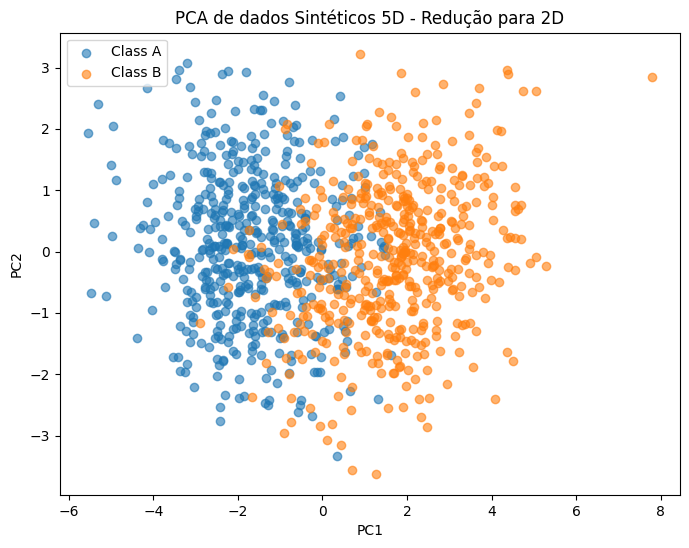

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)

mu_A = [0, 0, 0, 0, 0]
Sigma_A = np.array([
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
])

mu_B = [1.5, 1.5, 1.5, 1.5, 1.5]
Sigma_B = np.array([
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
])

class_A = np.random.multivariate_normal(mu_A, Sigma_A, size=500)
class_B = np.random.multivariate_normal(mu_B, Sigma_B, size=500)

X = np.vstack((class_A, class_B))
y = np.array([0]*500 + [1]*500)

print("Dataset shape:", X.shape)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.6, label="Class A")
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.6, label="Class B")
plt.title("PCA de dados Sintéticos 5D - Redução para 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


1.  **Visualize the Data:** Since you cannot directly plot a 5D graph, you must reduce its dimensionality.
    * Use a technique like **Principal Component Analysis (PCA)** to project the 5D data down to 2 dimensions.
    * Create a scatter plot of this 2D representation, coloring the points by their class (A or B).
1.  **Analyze the Plots:**
    1. Based on your 2D projection, describe the relationship between the two classes.
            
        - Very intertwined, making it extremely difficult to separate them clearly. They do tend to different sides of the plot (in the x-axis), but they do have noticeable overlap.
    1. Discuss the **linear separability** of the data. Explain why this type of data structure poses a challenge for simple linear models and would likely require a multi-layer neural network with non-linear activation functions to be classified accurately.

        - Creating a single line that segregates these two classes is not possible, given that they do have overlap. If you were to trace a line between them, it would end up inevitably classifying class A as class B and vice-versa.

***


## Exercise 3

### **Preparing Real-World Data for a Neural Network**

This exercise uses a real dataset from Kaggle. Your task is to perform the necessary preprocessing to make it suitable for a neural network that uses the hyperbolic tangent (`tanh`) activation function in its hidden layers.

### **Instructions**

1.  **Get the Data:** Download the [**Spaceship Titanic**](https://www.kaggle.com/competitions/spaceship-titanic) dataset from Kaggle.
2.  **Describe the Data:**
    * Briefly describe the dataset's objective (i.e., what does the `Transported` column represent?).
    * List the features and identify which are **numerical** (e.g., `Age`, `RoomService`) and which are **categorical** (e.g., `HomePlanet`, `Destination`).
    * Investigate the dataset for **missing values**. Which columns have them, and how many?
3.  **Preprocess the Data:** Your goal is to clean and transform the data so it can be fed into a neural network. The `tanh` activation function produces outputs in the range `[-1, 1]`, so your input data should be scaled appropriately for stable training.
    * **Handle Missing Data:** Devise and implement a strategy to handle the missing values in all the affected columns. Justify your choices.
    * **Encode Categorical Features:** Convert categorical columns like `HomePlanet`, `CryoSleep`, and `Destination` into a numerical format. One-hot encoding is a good choice.
    * **Normalize/Standardize Numerical Features:** Scale the numerical columns (e.g., `Age`, `RoomService`, etc.). Since the `tanh` activation function is centered at zero and outputs values in `[-1, 1]`, **Standardization** (to mean 0, std 1) or **Normalization** to a `[-1, 1]` range are excellent choices. Implement one and explain why it is a good practice for training neural networks with this activation function.
4.  **Visualize the Results:**
    * Create histograms for one or two numerical features (like `FoodCourt` or `Age`) **before** and **after** scaling to show the effect of your transformation.

***